<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Proyecto 1 
<br>
<br>

* * *

Alumno: Fernando Torres <br>
Fecha: 9 de octubre 2024 <br>

* * *

<br>
<br>

### Introduccion
El pronóstico de series de tiempo es una herramienta fundamental en el análisis de datos, especialmente en el ámbito financiero y energético. A medida que las empresas buscan optimizar su operación y tomar decisiones informadas, la capacidad de predecir la demanda y el comportamiento del mercado se convierte en un activo invaluable. En este contexto, utilizaremos datos históricos de precios de acciones y métricas relacionadas de NextEra Energy, obtenidos a través de Yahoo Finance, para realizar un análisis de series de tiempo en Python.

### Definicion
Las series de tiempo son conjuntos de datos recogidos o registrados en intervalos regulares de tiempo. Estas series pueden reflejar distintos fenómenos, como el consumo de energía, la producción eléctrica, o el precio de acciones, y son esenciales para identificar tendencias, patrones estacionales y ciclos en los datos. El análisis de series de tiempo permite a las empresas anticipar cambios futuros y adaptar su estrategia de negocio en consecuencia.

### Objetivo
El objetivo de este análisis es examinar y modelar las series de tiempo de los datos históricos de NextEra Energy durante los últimos 10 años. Esto incluirá la recopilación de datos, la identificación de patrones y tendencias, y la implementación de modelos de pronóstico utilizando Python. Al final del estudio, se espera proporcionar pronósticos precisos sobre el comportamiento futuro de los precios de las acciones de NextEra Energy, lo que podría servir como guía para la toma de decisiones estratégicas en el ámbito financiero.

Pronosticar los precios de cierre de las acciones es esencial para inversores y analistas financieros, ya que les permite tomar decisiones informadas sobre la compra, venta o retención de acciones. 
Entender las tendencias futuras puede ayudar a maximizar el rendimiento de las inversiones y gestionar el riesgo.
Se buscará pronosticar los precios de cierre para un horizonte de 6 a 12 meses en el futuro. Este rango permite a los inversores planificar sus estrategias a medio plazo, lo que es útil en un entorno financiero en constante cambio.
Estos datos representan el rendimiento de una de las compañías de energía más grandes y sostenibles en EE. UU., lo que tiene implicaciones tanto para los inversores como para la política energética y ambiental.
Los datos de precios de cierre se recopilan a través de Yahoo Finance, una plataforma que ofrece información financiera y datos históricos de mercado.
Dado que se utilizarán precios de cierre mensuales, los datos se recopilan una vez al mes.
Se utilizarán datos de los últimos 10 años, es decir, desde aproximadamente octubre de 2014 hasta octubre de 2024.
Los datos se obtendrán de Yahoo Finance

Tiene una tendencia alcista desde las fechas usadas. Hasta 2021 donde parece haber una ligera correccion o estabilizacion hasta 2024. 

Se mira una patron estacional que se repite anualmente consistente. Esto puede ser debido a los ultimos 3 meses de cada year que suele haber vacaciones o navidad.


Sus patrones son las estacionalidades como ya comentaba se repite las fechas calurosas o de vacaciones y sus valores atipicos podrian ser su punto mas alto a finales de 2021 y su caida mas grande despues a principios de 2024


La media de 47.18 la mediana de 44.46, la desviacion estandar de 22.09 y la varianza de 488.36

### Nueva Variable: Temperatura Promedio en Miami

Debido a la relación entre la demanda de energía y el clima, se ha decidido incorporar una nueva variable al análisis: **la temperatura promedio en Miami** desde el año 2012. Esta variable es clave para NextEra Energy, ya que el calor extremo impulsa la demanda de electricidad para el aire acondicionado, especialmente durante los meses de verano.

Para esto, se han obtenido los datos de temperatura promedio mensual de Miami a partir de 2012 hasta el presente, y se correlacionarán con los precios de las acciones para identificar patrones o relaciones significativas.

La hipótesis es que a medida que aumente la temperatura promedio en verano, también se incrementará la demanda de energía, lo cual podría reflejarse en un aumento de los precios de la energía en el mercado.



[*********************100%%**********************]  1 of 1 completed


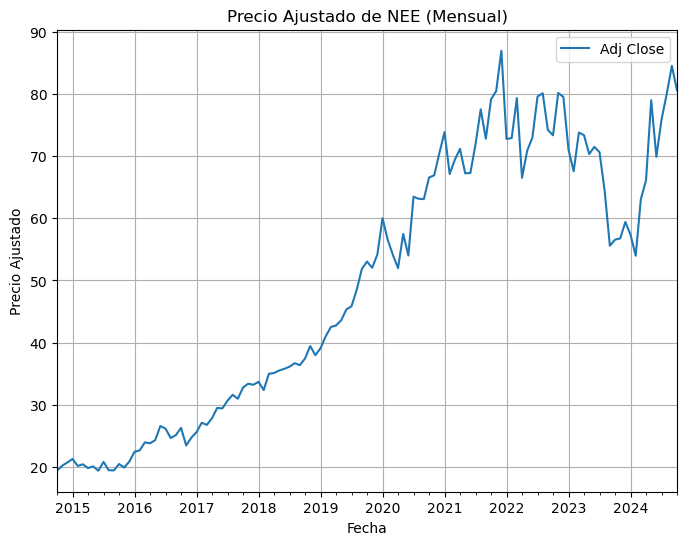

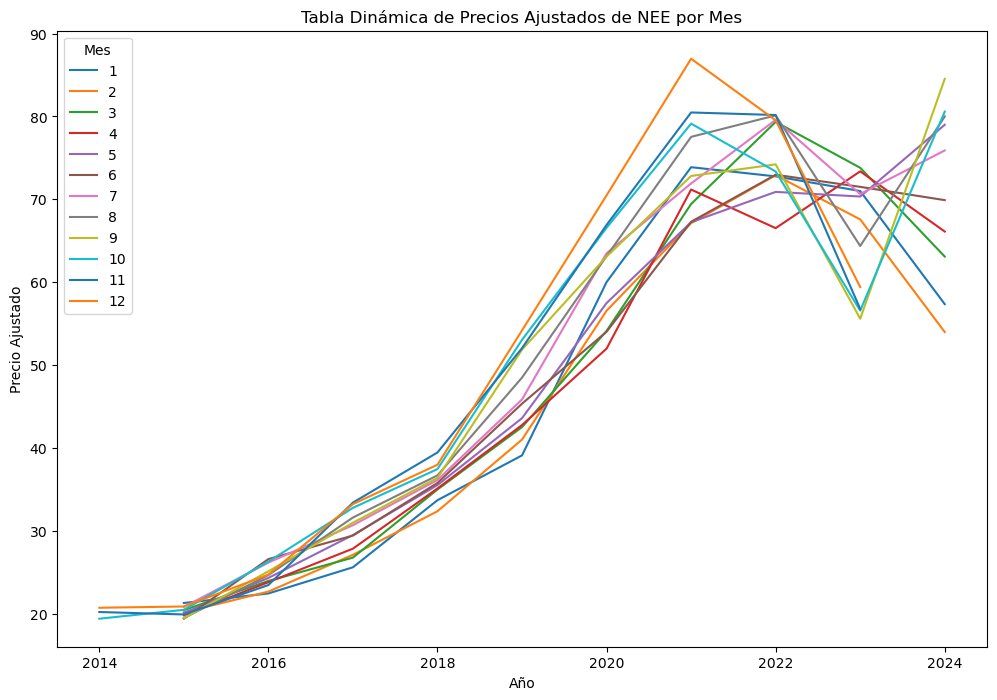

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar los datos
stocks = ['NEE']
data = yf.download(stocks, start='2014-10-01', interval='1mo')

# Crear un DataFrame solo con la columna 'Adj Close'
adj_close_df = data[['Adj Close']].copy()

# Graficar los precios ajustados
adj_close_df.plot(figsize=(8, 6), grid=True)
plt.title('Precio Ajustado de NEE (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

# Obtener el índice de año y mes
piv_index = adj_close_df.index.year
piv_season = adj_close_df.index.month

# Crear una tabla dinámica
piv = pd.pivot_table(adj_close_df, index=piv_index, columns=piv_season, values='Adj Close')

# Graficar la tabla dinámica
piv.plot(figsize=(12, 8))
plt.title('Tabla Dinámica de Precios Ajustados de NEE por Mes')
plt.xlabel('Año')
plt.ylabel('Precio Ajustado')
plt.legend(title='Mes')
plt.show()


De Junio a Septiembre: Pueden mostrar picos en los precios debido a un aumento en la demanda de electricidad para refrigeración. Esto es especialmente relevante en estados cálidos como Florida, donde NextEra Energy tiene una gran participación de mercado.
De Diciembre a Febrero: Podrían reflejar precios más bajos, a menos que haya eventos climáticos extremos que aumenten la demanda

Si junio de 2022 presenta precios significativamente más altos que junio de 2021, esto podría sugerir un aumento en la demanda o costos de producción

[*********************100%%**********************]  1 of 1 completed


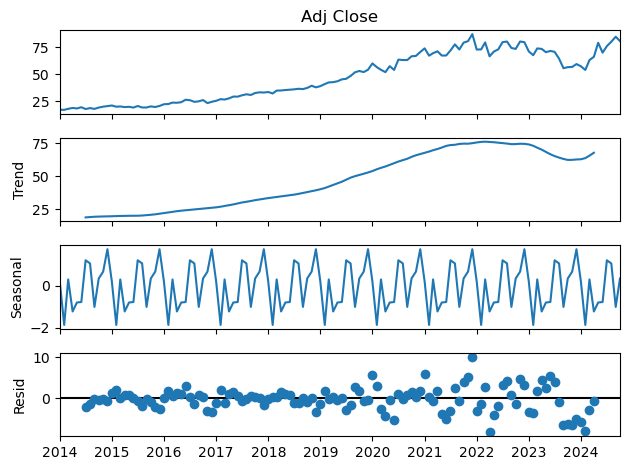

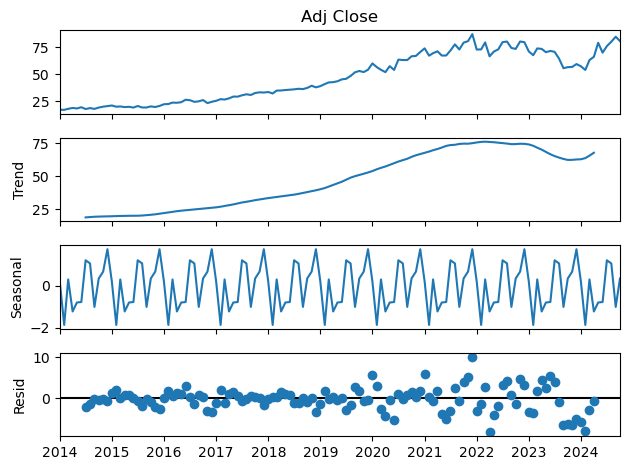

In [6]:
stocks = ['NEE']
d = yf.download(stocks, start='2014-01-01', interval='1mo')['Adj Close']
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result = seasonal_decompose(d, model='additive')
result.plot()

### Interpretación de los Gráficos

En este análisis de series de tiempo, los gráficos muestran tanto las tendencias generales de los precios de la energía como algunos patrones estacionales y anomalías.

- **Tendencias Generales**: Los precios de las acciones de NextEra Energy han mostrado una tendencia general al alza en los últimos 10 años. Esto puede estar vinculado con la creciente demanda de energía renovable y las políticas ambientales que favorecen este tipo de fuentes energéticas. 
- **Patrones Estacionales**: Se observa un incremento de los precios durante los meses de verano, especialmente entre mayo y septiembre. Esto puede estar relacionado con un aumento en la demanda de energía eléctrica debido al uso extendido de sistemas de aire acondicionado en estados como Florida y otras regiones del sur de Estados Unidos.
- **Anomalías**: Algunos picos repentinos, como los observados en ciertos puntos en 2020, pueden estar asociados con eventos macroeconómicos o específicos de la empresa, como adquisiciones o cambios regulatorios en el sector energético.



In [3]:
d.describe()

count    130.000000
mean      47.145672
std       22.037960
min       17.287577
25%       25.240592
50%       44.467869
75%       68.968145
max       86.963425
Name: Adj Close, dtype: float64

In [4]:
# Calcular las medidas estadísticas de tendencia central y dispersión
mean_d = d.mean()  # Media
median_d = d.median()  # Mediana
std_d = d.std()  # Desviación estándar
var_d = d.var()  # Varianza

mean_d, median_d, std_d, var_d


(47.14567237267127, 44.46786880493164, 22.037959802360863, 485.67167225047325)